<a href="https://colab.research.google.com/github/Fadlanbima/PCD_HistogramCitra/blob/main/UAS_KELOMPOK_pcd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Histogram Citra**


1.   Histogram RGB dan Grayscale
2.   Menghitung Histogram
1.   Normalisasi Histogram
1.   Gelap, Terang, Kontras Tinggi dan Kontras Rendah serta karakteristik histogramnya
2.   Mean Value Derajat Keabuan
2.   Variansi dan Standar Deviasi pada Histogram
1.   Contoh Perbedaan karakteristik histogram pada citra normal dengan blur

## Import Moduls

In [ ]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageEnhance 
from os.path import basename
from os.path import splitext

In [ ]:
!git clone https://github.com/Fadlanbima/PCD_HistogramCitra.git

Cloning into 'PCD_HistogramCitra'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 43 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (43/43), done.


## Load Image

In [ ]:
path = '/content/PCD_HistogramCitra/data/image.jpeg'

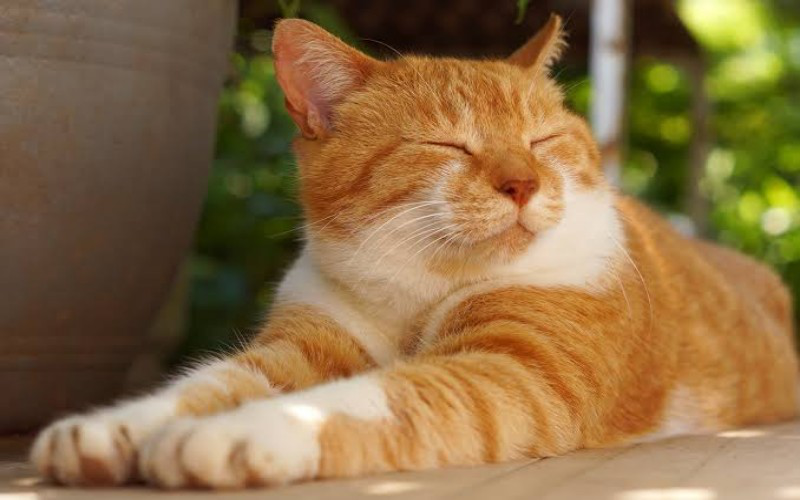

In [ ]:
#open image
img = Image.open(path)
img

## Histogram RGB dan Grayscale



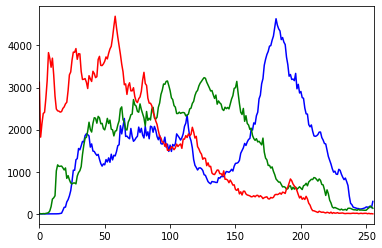

In [ ]:
pic = np.array(img)
for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([pic], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
    
plt.show()

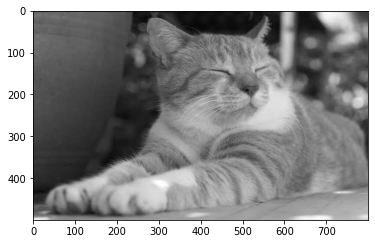

In [ ]:
# grayscale histogram
gray_img = img.convert('L')
gray = np.array(gray_img)
plt.imshow(gray, cmap = "gray")

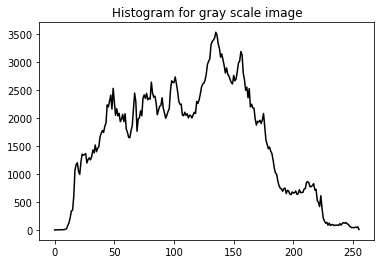

In [ ]:
gray_hist = cv2.calcHist([gray],[0],None,[256],[0,256])
plt.plot(gray_hist, color = 'k')
plt.title('Histogram for gray scale image')
plt.show()

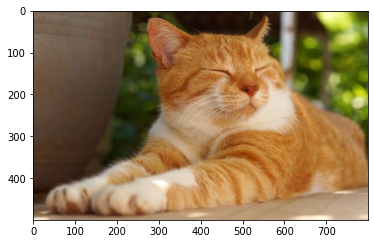

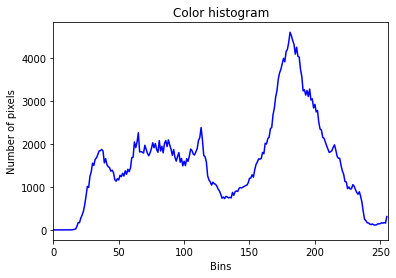

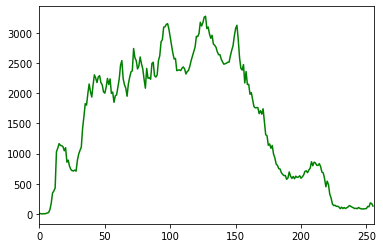

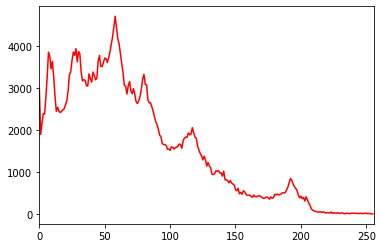

In [ ]:
path = r"/content/PCD_HistogramCitra/data/image.jpeg"
colormap1 = cv2.imread(path)
colormap1=cv2.cvtColor(colormap1, cv2.COLOR_BGR2RGB)
plt.imshow(colormap1)
chans=cv2.split(colormap1)
colors=("b", "g", "r")
plt.figure()
plt.title("Color histogram")
plt.xlabel("Bins")
plt.ylabel("Number of pixels")
for (chan, c) in zip(chans, colors):
    hist=cv2.calcHist([chan], [0], None, [256], [0,256])
    plt.plot(hist, color=c)
    plt.xlim([0,256])
    plt.show()

## Blur Image Histogram

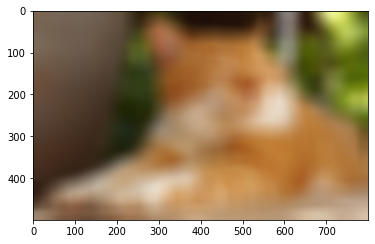

In [ ]:
# histogram blur image
blur = cv2.blur(pic, (50,50))
plt.imshow(blur)

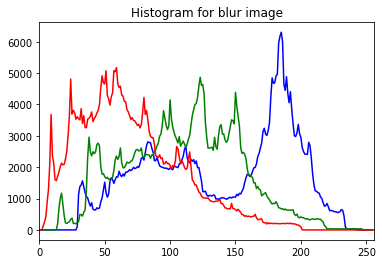

In [ ]:
for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([blur], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
    
plt.title('Histogram for blur image')
plt.show()

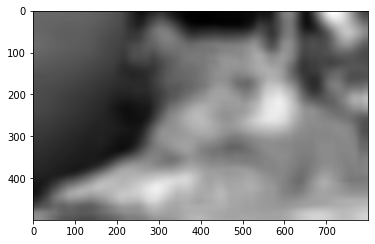

In [ ]:
gray_blur = cv2.blur(gray, (50,50))
plt.imshow(gray_blur, cmap='gray')

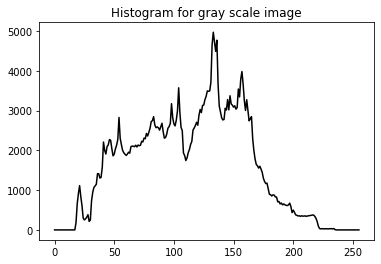

In [ ]:
gray_hist = cv2.calcHist([gray_blur],[0],None,[256],[0,256])
plt.plot(gray_hist, color = 'k')
plt.title('Histogram for gray scale image')
plt.show()

## histogram normalization

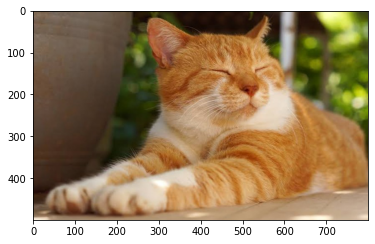

In [ ]:
# histogram normalization 
norm = np.zeros((800,800))
normal = cv2.normalize(pic,  norm, 0, 255, cv2.NORM_MINMAX)
plt.imshow(normal)

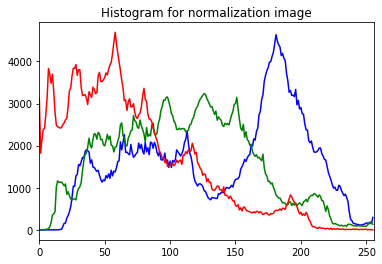

In [ ]:
for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([normal], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
    
plt.title('Histogram for normalization image')
plt.show()

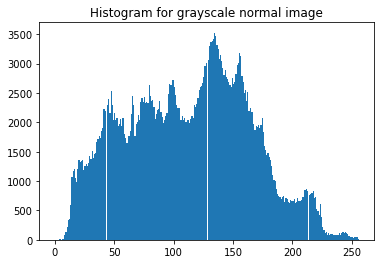

In [ ]:
normal = cv2.normalize(gray,  norm, 0, 255, cv2.NORM_MINMAX)
plt.hist(normal.ravel(),256,[0,256])
plt.title('Histogram for grayscale normal image')
plt.show()

In [ ]:
normal.ravel()

array([102, 102, 102, ..., 199, 199, 199], dtype=uint8)

## Gelap, Terang, Kontras Tinggi dan Kontras Rendah serta karakteristik histogramnya

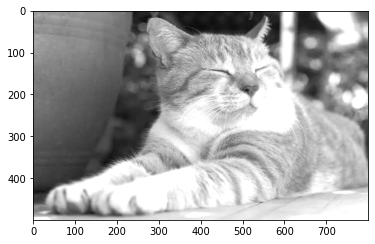

In [ ]:
# Citra terang (over exposed)
alpha = 1.0 # Contrast control (1.0-3.0)
beta = 80 # Brightness control (-100-100)

over_exposed = cv2.addWeighted(gray,alpha, np.zeros(gray.shape, gray.dtype),0,beta)
plt.imshow(over_exposed, cmap='gray')

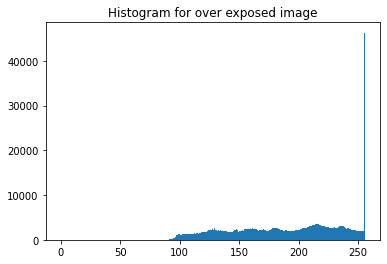

In [ ]:
plt.hist(over_exposed.ravel(),256,[0,256])
plt.title('Histogram for over exposed image')
plt.show()

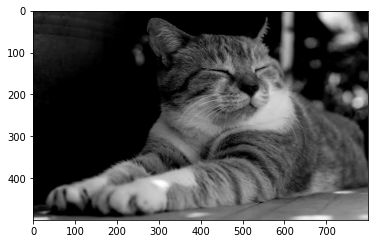

In [ ]:
# Citra gelap (under exposed)
alpha = 1.0 
beta = -80 

under_exposed = cv2.addWeighted(gray,alpha, np.zeros(gray.shape, gray.dtype),0,beta)
plt.imshow(under_exposed, cmap='gray')

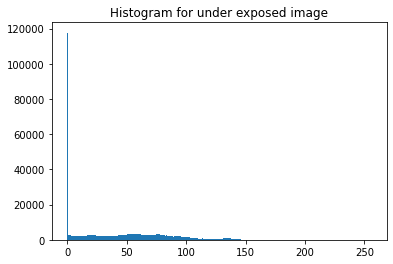

In [ ]:
plt.hist(under_exposed.ravel(),256,[0,256])
plt.title('Histogram for under exposed image')
plt.show()

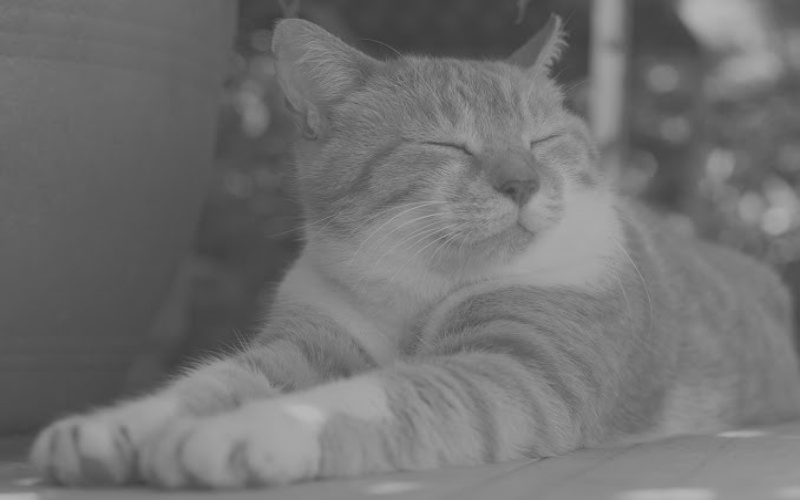

In [ ]:
# Citra kontras rendah (low contrast)
enhancer = ImageEnhance.Contrast(gray_img)
factor = 0.5 #decrease constrast
low_contrast = enhancer.enhance(factor)
low_contrast

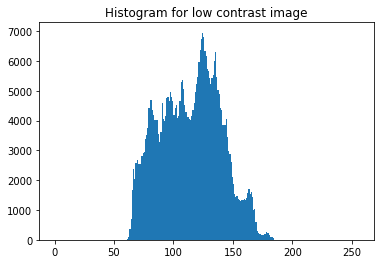

In [ ]:
a = np.array(low_contrast)
plt.hist(a.ravel(),256,[0,256])
plt.title('Histogram for low contrast image')
plt.show()

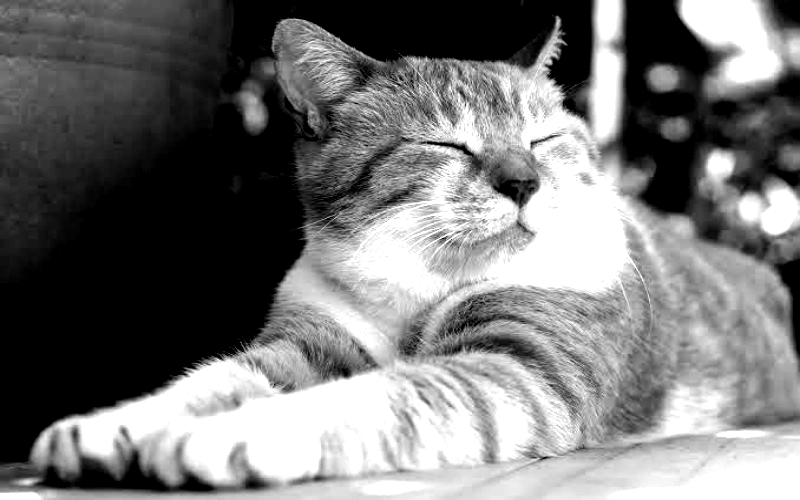

In [ ]:
factor = 2.5 #increase contrast
high_contrast = enhancer.enhance(factor)
high_contrast

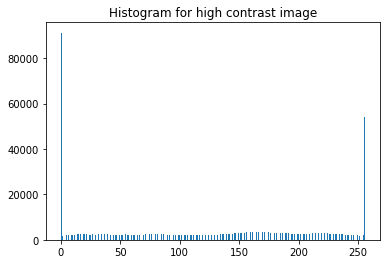

In [ ]:
b = np.array(high_contrast)
plt.hist(b.ravel(),256,[0,256])
plt.title('Histogram for high contrast image')
plt.show()

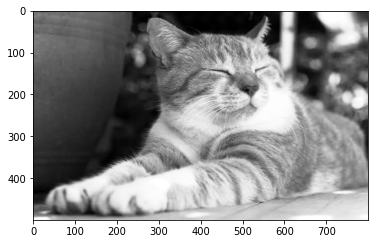

In [ ]:
# normal brightness dan high contrast
image_enhanced = cv2.equalizeHist(gray)
plt.imshow(image_enhanced, cmap='gray')

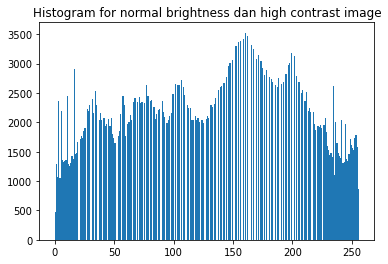

In [ ]:
plt.hist(image_enhanced.ravel(),256,[0,256])
plt.title('Histogram for normal brightness dan high contrast image')
plt.show()

## Mean, Variance, Standard Deviation Histogram

In [ ]:
counts, bins = np.histogram(gray_hist)
mids = 0.5*(bins[1:] + bins[:-1])
probs = counts / np.sum(counts)

In [ ]:
grayf = gray.astype(np.float32)
grayf2 = grayf * grayf
imean = np.mean(gray)
imeanf2 = np.mean(grayf2)
ivar = imeanf2 - imean**2
print('image variance :', ivar)

image variance : 2615.1200310886943


In [ ]:
mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))
print('image mean :', mean)

image mean : 1622.3625174760818


In [ ]:
print('image Standard deviation :', sd)

image Standard deviation : 1239.6447683952417
